In [ ]:
# ZADANIE 1

Cechy:
 ['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


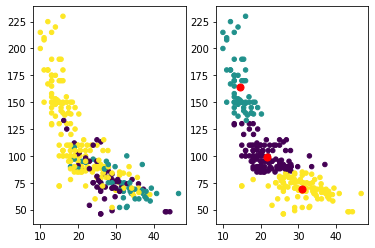

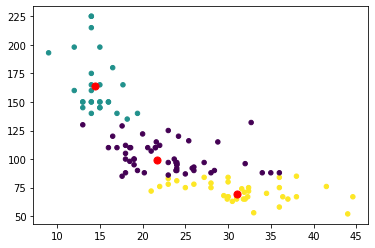

In [30]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Importowanie zbioru danych o samochodach
from sklearn.datasets import fetch_openml
samochody = fetch_openml('cars1')
print('Cechy:\n', samochody.feature_names)

# Wybieranie cechy 1 oraz 4.
# Cecha 1, czyli MPG (miles per gallon) określa spalanie auta, czyli to, ile mil przejedzie ono na jednym galonie paliwa.
# Cecha 4, czyli horsepower określa ilość koni mechanicznych.
X = samochody.data[:, [0, 3]]
y = samochody['target']

# Konwersja typów dla y
y = [int(elem) for elem in y]

# Używanie funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzenie klasyfikatora z trzema klastrami (klasami)
kmn = KMeans(n_clusters=3)

# Uczenie klasyfikatora na danych treningowych
print(kmn.fit(X_train))

import matplotlib.pyplot as plt
%matplotlib inline

# Wyciąganie punktów centralnych klastrów - pokazanie ich na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_
fig, ax = plt.subplots(1, 2)

# Pierwszy wykres to zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Używanie danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładanie na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

import matplotlib.pyplot as plt
%matplotlib inline

# Próbowanie przewidzienia gatunków dla zbioru testowego
y_pred = kmn.predict(X_test)

# Przewidywanie nowych gatunków przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Wyświetlanie centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

In [ ]:
# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze

# Możliwe, że w ziorze znalazły się samochody klasy miejskiej/kompaktowej.